## YULU - Electric Bikes 
### Exploratory Data Analysis 

##### About Yulu and Problem Statement for analysis
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#### 1. Initial Exploratory Analysis of the data

In [102]:
# Let us import all the pakages we would be using 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats 

In [103]:
# Let us load the data set into variable 'df' 

df = pd.read_csv('bike_sharing.txt') 

In [104]:
# lets peek into the number of rows the datapoints and columns the features of the dataset 
print(df.shape)
print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

(10886, 12)
number of rows:  10886
number of columns:  12


In [105]:
# lets see the data types of the columsn 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### 2. Missing values analysis 

In [106]:
# Missing values analysis 
df.isna().sum()

# We do not have any missing values to be concerned with.

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### 3. Univariate analysis

In [107]:
# lets peek into the dataset 
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [108]:
# We can see a lot of categorical columns
# Let us check, validate and convert those columns into dtype 'category'
print('Season:') 
print(df.season.value_counts())

print('\nHoliday:')
print(df.holiday.value_counts())

print('\nWeather:', )
print(df.weather.value_counts())

Season:
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

Holiday:
0    10575
1      311
Name: holiday, dtype: int64

Weather:
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


In [109]:
# Converting 'sesson', 'holiday', and 'weather' features into 'category' dtype 

df['season'] = df.season.astype('category') 
df['holiday'] = df.holiday.astype('category') 
df['weather'] = df.weather.astype('category') 

In [110]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

#### Analysis of Season, Holiday and Working day

<AxesSubplot:xlabel='workingday', ylabel='count'>

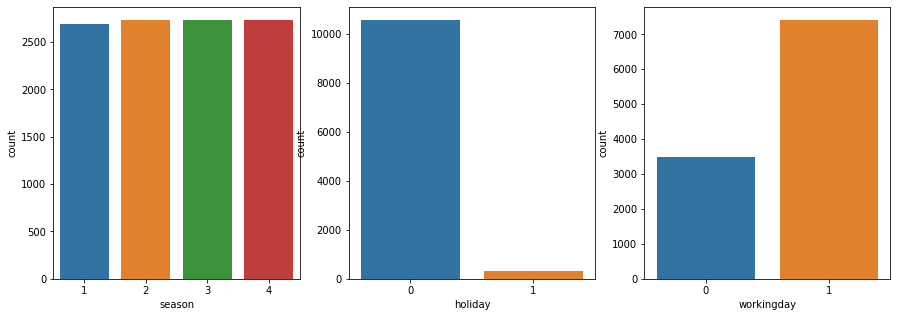

In [111]:
plt.figure(figsize = (15,5))
plt.subplot(131)
sns.countplot(data = df, x = 'season')

plt.subplot(132) 
sns.countplot(data = df, x = 'holiday')

plt.subplot(133) 
sns.countplot(data = df, x = 'workingday')

In [112]:
print("Season")
print((df.season.value_counts(normalize = True)*100).round(2)) 
print('>> seasons are evenly distributed.')

print("\nHoliday")
print((df.holiday.value_counts(normalize= True)*100).round(2))
print(">> there are only 3% of holidays in total")

print('\nWorkingdays Breakdown')
print((df.workingday.value_counts(normalize = True)*100).round(2))
print('>> working vs non working day is close to 70-30%')

Season
4    25.11
2    25.11
3    25.11
1    24.67
Name: season, dtype: float64
>> seasons are evenly distributed.

Holiday
0    97.14
1     2.86
Name: holiday, dtype: float64
>> there are only 3% of holidays in total

Workingdays Breakdown
1    68.09
0    31.91
Name: workingday, dtype: float64
>> working vs non working day is close to 70-30%


## Date time analysis 

In [113]:
# df['datetime'] = pd.to_datetime(df['datetime'])

In [114]:
# df['time'] = df['datetime'].dt.time 
# df['date'] = df['datetime'].dt.date

In [115]:
# df.groupby(['time']).agg('count')

# print("Conclusion: All the datapoints is evenly distributed on all hours of the day. ")

In [116]:
# We saw that season 1,2,3,4 are evenly distributed so we won't do any date-month breakdown analysis. 

print(df.season.value_counts(normalize=True)*100)

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64


In [117]:
## Dropping all the datetime columns. 

# df.drop(columns=['datetime', 'time', 'date'], inplace=True)

In [118]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### number of bikes used => 'count' feature

<AxesSubplot:xlabel='count'>

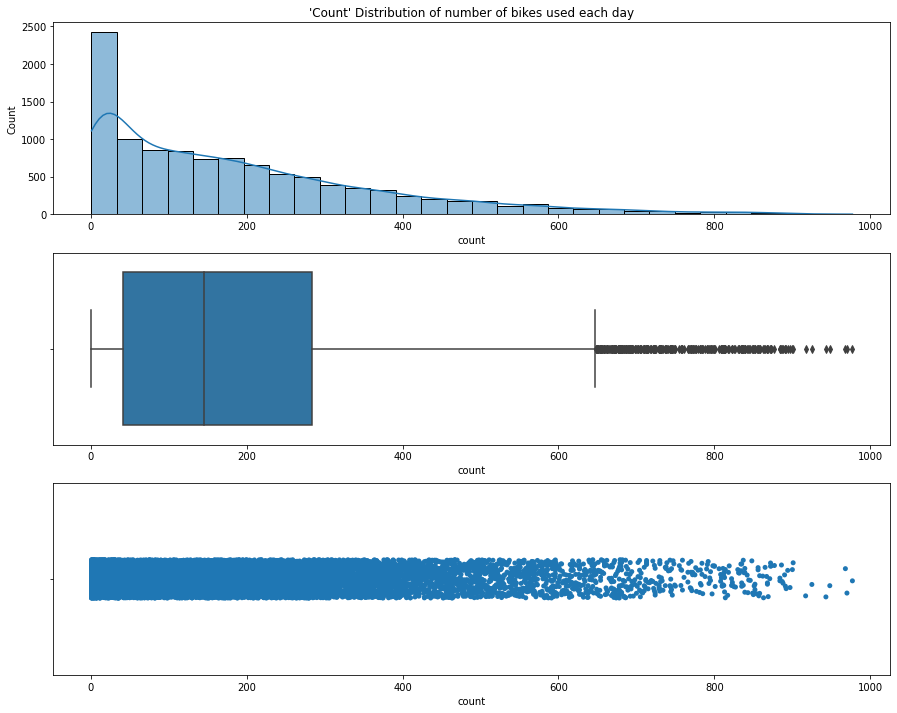

In [136]:
plt.figure(figsize=(15,12))
plt.subplot(311)
sns.histplot(data = df, x = 'count', bins = 30, kde = True)
plt.title("'Count' Distribution of number of bikes used each day")

plt.subplot(312)
sns.boxplot(data = df, x = 'count') 

plt.subplot(313) 
sns.stripplot(data = df, x = 'count')

In [147]:
np.percentile(df['count'], [0, 95])

array([  1.  , 563.75])

### Bi-Variate Analysis 

##### 'working_day' vs 'Count'

let us see if there is any dependency on weather a working day and a non working day affects the usage sales of yulu bikes. 
Lets start with stating/assuming our null and alternate hypothesis. 

H0 = Null Hypothesis = There is no differnce in the distribution of 'count' values on a working and non- working day.

H1 = Alternate Hypothesis = Looking at the p value there is significant confidence to reject the null hypothesis.  


<AxesSubplot:xlabel='count'>

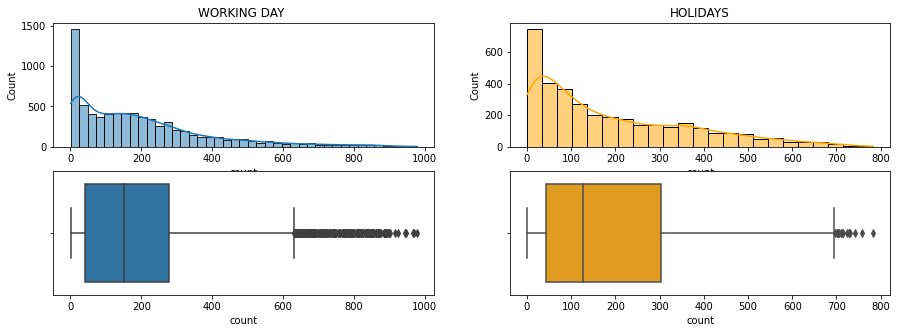

In [160]:
plt.figure(figsize= (15, 5))
plt.subplot(221) 
sns.histplot(data = df[df.workingday == 1], x = 'count', kde = True) 
plt.title('WORKING DAY ')

plt.subplot(222) 
sns.histplot(data = df[df.workingday == 0], x = 'count', kde = True, color= 'orange') 
plt.title("HOLIDAYS")

plt.subplot(223) 
sns.boxplot(data = df[df.workingday == 1], x = 'count')

plt.subplot(224)
sns.boxplot(data = df[df.workingday == 0], x = 'count', color = 'orange') 

In [164]:
# Filtering out working day and non working data points
working_day = df[df.workingday == 1]['count']
non_working_day = df[df.workingday == 0]['count']

In [172]:
print('working_day: ',np.percentile(working_day, [0, 96]))
print('non working day: ', np.percentile(non_working_day, [0,99]))

working_day:  [  1. 618.]
non working day:  [  1. 668.]


In [175]:
working_day_without_outliers = np.percentile(working_day,[0,96])
non_working_day_without_outliers = np.percentile(non_working_day, [0,99])

In [182]:
print("Mean")
print('working_day: ', np.mean(working_day).round(2))
print('non_working_day: ', np.mean(non_working_day).round(2))

Mean
working_day:  193.01
non_working_day:  188.51


In [368]:
working_day = working_day.sample(3422)
non_working_day = non_working_day.sample(3422)
# carrying out two sampled t test to test our defined hypothsis 
# H0 = Null Hypothesis = There is no differnce in the distribution of 'count' values on a working and non- working day.
# H1 = Alternate Hypothesis = Looking at the p value there is significant confidence to reject the null hypothesis.  

print('t test of working day and non-working day')
print(stats.ttest_ind(working_day, non_working_day)) 

print('\n')

print('Without outliers t test')
print(stats.ttest_ind(working_day_without_outliers, non_working_day_without_outliers))

t test of working day and non-working day
Ttest_indResult(statistic=1.4424471537342192, pvalue=0.14922204347569926)


Without outliers t test
Ttest_indResult(statistic=-0.055028914835874465, pvalue=0.9611181053828726)


- we can see that the p values are significantly high
- let us set our alpha - significance level to be 0.05.
- after performing t test the p_value came out to be 0.22 which is greater that the set significance value 0.05.

Conclusion: we fail to reject our null hypothesis and conclude that there is no difference in the distribution of 'count' values on a normal working day and on non- working day.

#### 'Holiday' vs 'Count'

<AxesSubplot:xlabel='count'>

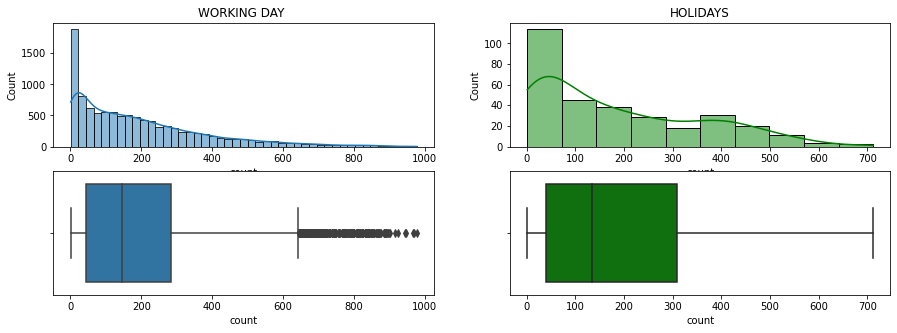

In [187]:
plt.figure(figsize= (15, 5))
plt.subplot(221) 
sns.histplot(data = df[df.holiday == 0], x = 'count', kde = True) 
plt.title('WORKING DAY ')

plt.subplot(222) 
sns.histplot(data = df[df.holiday == 1], x = 'count', kde = True, color = 'green') 
plt.title("HOLIDAYS")

plt.subplot(223) 
sns.boxplot(data = df[df.holiday == 0], x = 'count')

plt.subplot(224)
sns.boxplot(data = df[df.holiday == 1], x = 'count', color = 'green') 

0    97.14
1     2.86
Name: holiday, dtype: float64


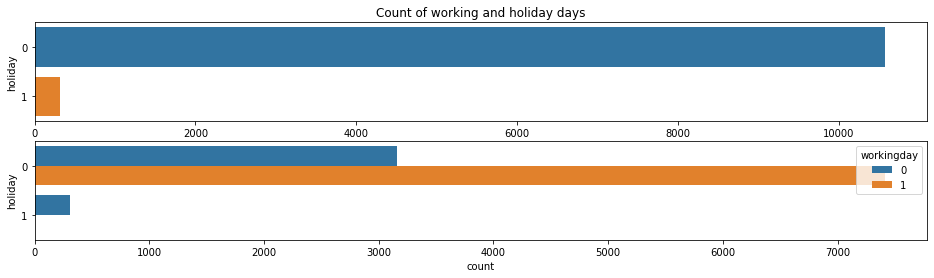

In [203]:
plt.figure(figsize=(16,4))
plt.subplot(211)
sns.countplot(data = df, y = 'holiday')
plt.title('Count of working and holiday days')

plt.subplot(212)
sns.countplot(data = df, y = 'holiday', hue = 'workingday')


print((df.holiday.value_counts(normalize=True)*100).round(2))

Lets carry out a hypothesis
- h0 - there is no difference in the distribution of 'count' on a holiday vs a normal day. 
- h1 - the is significant difference and the variable 'holiday' is dependent on 'count' = number of yulu bikes used.

In [212]:
## lets perform a two sampled t test to figure out if there is any significant difference in usage of bikes on holidays and normal day.

t_stat, p_value = stats.ttest_ind(df[df.holiday == 1]['count'], df[df.holiday ==0]['count'])
print("t statistic: ", t_stat) 
print("p value: ", p_value)
print()
print('The p value came out to be 0.57 ')
print("We infer that there is a 57% chance that the distribution seen on a holiday can we found on a normal day distribution")
print()
print("means: ")
print("holiday :", df[df.holiday ==1]['count'].mean().round(2))
print("non holiday: ", df[df.holiday == 0]['count'].mean().round(2))

t statistic:  -0.5626388963477119
p value:  0.5736923883271103

The p value came out to be 0.57 
We infer that there is a 57% chance that the distribution seen on a holiday can we found on a normal day distribution

means: 
holiday : 185.88
non holiday:  191.74


### 'Season' vs 'Count' 

the datapoints is evenly distributed in our given dataset


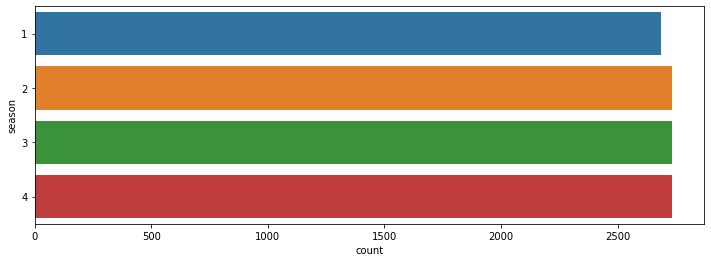

In [277]:
plt.figure(figsize = (12,4))

sns.countplot(data = df, y = 'season')
print('the datapoints is evenly distributed in our given dataset')

In [219]:
# lets see if there is any significant difference in the distribution among the 4 seasons.

In [226]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<Figure size 1152x576 with 0 Axes>

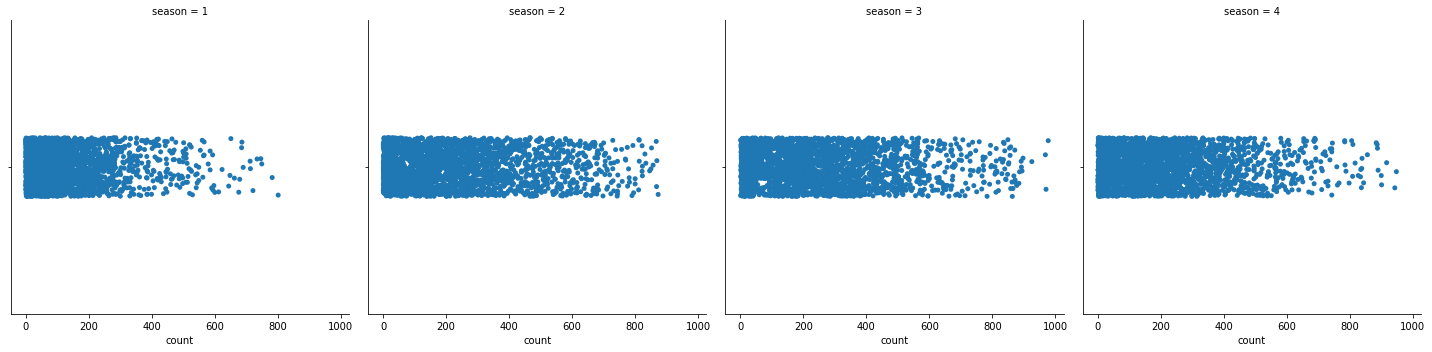

In [245]:
plt.figure(figsize = (16,8))

sns.catplot(data = df, x = 'count', col = 'season')

In [268]:
print("CONFIDENCE INTERVAL Accross seasons")
print(np.percentile(df[df.season ==1 ]['count'], [0,97]))
print(np.percentile(df[df.season ==2 ]['count'], [0,97]))
print(np.percentile(df[df.season ==3 ]['count'], [0,97]))
print(np.percentile(df[df.season ==4 ]['count'], [0,97]))

season_1 = df[(df.season ==1) & (df['count'] <460) ]['count']
season_2 = df[(df.season ==2) & (df['count'] <671) ]['count']
season_3 = df[(df.season ==3) & (df['count'] <702) ]['count']
season_4 = df[(df.season ==4) & (df['count'] <620) ]['count']

## Cutting out the outliers just taking the upto 97th percentile of the data.

CONFIDENCE INTERVAL Accross seasons
[  1.   459.45]
[  1.   671.04]
[  1.   702.08]
[  1. 620.]


In [274]:
# Carrying out a hypothesis. 
# h0 - There is no difference in the usage across seasons 1, 2, 3, 4. 
# h1 - There is significant differece in the 'count' values between the 4 seasons 
print(stats.kruskal(season_1, season_2, season_3, season_4) )
print("P value is very small from which we can confidently reject our null hypothesis")
print("the distribution across 4 seasons is different")
print()
print("Means across 4 seasons") 
print("Season 1: ", season_1.mean().round(2))
print("Season 2: ", season_2.mean().round(2))
print("Season 3: ", season_3.mean().round(2))
print("Season 4: ", season_4.mean().round(2)) 

KruskalResult(statistic=750.7856222630832, pvalue=2.0382099463962882e-162)
P value is very small from which we can confidently reject our null hypothesis
the distribution across 4 seasons is different

Means across 4 seasons
Season 1:  102.53
Season 2:  198.45
Season 3:  216.41
Season 4:  182.21


Conclusion: The number of bikes used is dependent on the season variable. 
we see that during season 1 significantly less amount of bikes are used and during season 3 there is huge demand, followed by season 2 and 4.

In [275]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Weather vs Count

lets see how weather impacts the demand of yulu bikes. 

1. Clear, Few clouds, partly cloudy, partly cloudy 
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Percentage distribution of weather
1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64


<AxesSubplot:xlabel='count', ylabel='weather'>

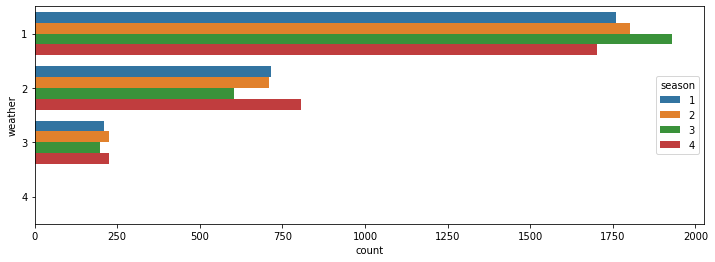

In [285]:
print("Percentage distribution of weather")
print((df.weather.value_counts(normalize=True) * 100).round(2))

plt.figure(figsize=(12,4)) 
sns.countplot(data = df, y = 'weather', hue = 'season')

In [298]:
weather_1 = df[df.weather ==1 ]
weather_2 = df[df.weather ==2 ]
weather_3 = df[df.weather ==3 ]
weather_4 = df[df.weather ==4 ]

Text(0.5, 1.0, 'Weather 4')

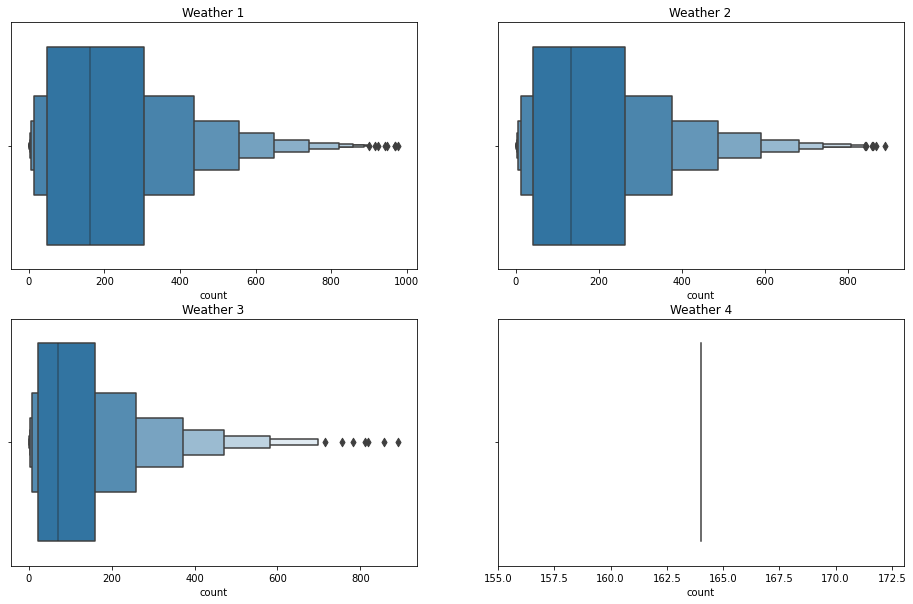

In [302]:
plt.figure(figsize = (16,10))
plt.subplot(221)
sns.boxenplot(data = weather_1, x = 'count')
plt.title('Weather 1')

plt.subplot(222)
sns.boxenplot(data = weather_2,  x = 'count')
plt.title('Weather 2')

plt.subplot(223)
sns.boxenplot(data = weather_3,  x = 'count')
plt.title('Weather 3')

plt.subplot(224)
sns.boxenplot(data = weather_4,  x = 'count')
plt.title('Weather 4')

#### Let's perform levene's test for equality of variance and Kruskal test for independent samples. 

We will exclude weather 4 data as there is only one data point. 

- The scale for extreme weather is given by 1, 2, 3, 4.
- 1 being least extreme.
- Let us set up our hypothesis
- H0 - Median of all of the groups are equal
- H1 - The Otherwise, weather is dependent upto the count of yulu bikes.


In [314]:
print(stats.levene(weather_1['count'], weather_2['count'], weather_3['count'], center = 'median'))

print(stats.kruskal(weather_1['count'], weather_2['count'], weather_3['count']))

print()
print("Means of the weather 1, 2, 3 in order: ") 
print(weather_1['count'].mean().round(2))
print(weather_2['count'].mean().round(2))
print(weather_3['count'].mean().round(2))

LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)
KruskalResult(statistic=30.07604593905851, pvalue=4.15431143051423e-08)

Means of the weather 1, 2, 3 in order: 
205.24
178.96
118.85


In [332]:
# Lets remove the outliers and perform the test again. 
one = weather_1[weather_1['count'] < np.percentile(weather_1['count'],[0,97])[1]]['count']
two = weather_2[weather_2['count'] < np.percentile(weather_2['count'],[0,97])[1]]['count']
three = weather_3[weather_3['count'] < np.percentile(weather_3['count'],[0,97])[1]]['count']

In [334]:
print(stats.levene(one, two, three)) 
print(stats.kruskal(one, two, three)) 

print("Means : ") 
print(one.mean().round(2)) 
print(two.mean().round(2)) 
print(three.mean().round(2))

LeveneResult(statistic=128.15589872810904, pvalue=1.0177297756268477e-55)
KruskalResult(statistic=222.20355301374246, pvalue=5.611920801752003e-49)
Means : 
188.06
162.66
102.82


We can confidently reject our null hypothesis as the p values are almost negligible.
- Levene's Test Conclusion: We infer that there is significant level of variance among the 3 weather datapoints.
- Kruskal' Test : The median count of the 3 data sets are significantly different suggesting that there is dependency on the 'weather' variable on the usage of Yulu Bikes.
- Weather 1 favors the usage of more bikes, followed by subsequent much greater harsh extreme whethers 2, 3 

### Weather vs Season

In [342]:
weather_season = pd.crosstab(df['weather'], df['season'])
print(weather_season)
weather_season.drop(index=4, inplace=True)
print()
print(weather_season)

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225


In [343]:
## Carrying out chi2 test 

stats.chi2_contingency(weather_season) 

(46.101457310732485,
 2.8260014509929403e-08,
 6,
 array([[1774.04869086, 1805.76352779, 1805.76352779, 1806.42425356],
        [ 699.06201194,  711.55920992,  711.55920992,  711.81956821],
        [ 211.8892972 ,  215.67726229,  215.67726229,  215.75617823]]))

Conclusion: There is no dependency in Weather Vs Season.

### Numerical Variables

In [352]:
numerical = df[['temp', 'atemp', 'humidity', 'windspeed', 'count']]
numerical.head()

,temp,atemp,humidity,windspeed,count
0,9.84,14.395,81,0.0,16
1,9.02,13.635,80,0.0,40
2,9.02,13.635,80,0.0,32
3,9.84,14.395,75,0.0,13
4,9.84,14.395,75,0.0,1


Text(0.5, 1.0, 'Temp vs Count')

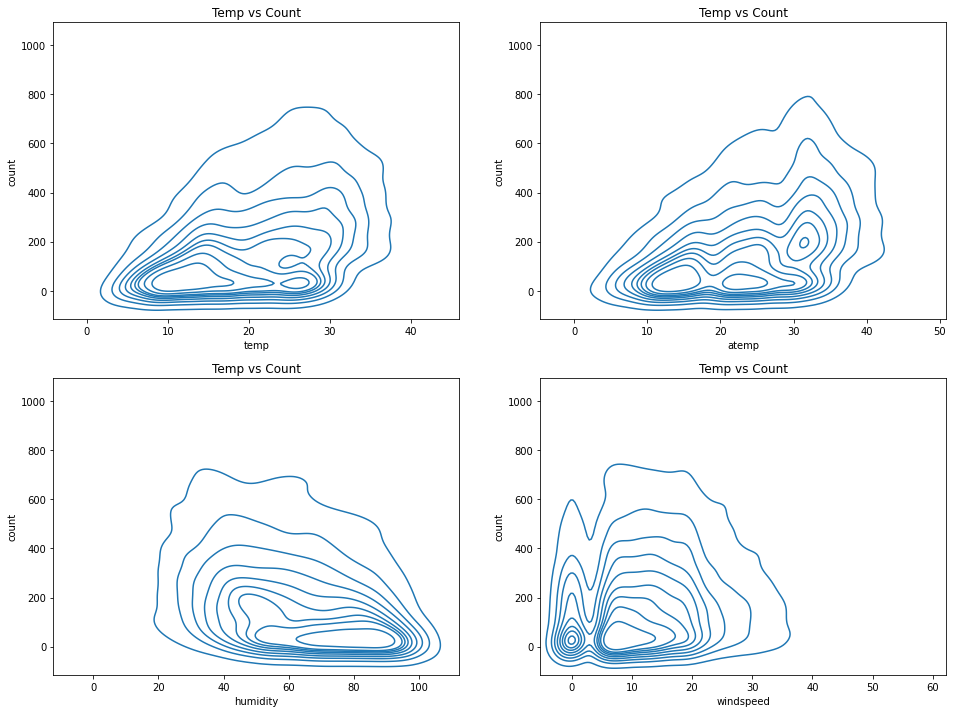

In [367]:
plt.figure(figsize = (16,12)) 
plt.subplot(2,2,1)
sns.kdeplot(data = numerical, x = 'temp', y = 'count')
plt.title('Temp vs Count')

plt.subplot(2,2,2)
sns.kdeplot(data = numerical, x = 'atemp', y = 'count')
plt.title('Temp vs Count')

plt.subplot(2,2,3)
sns.kdeplot(data = numerical, x = 'humidity', y = 'count')
plt.title('Temp vs Count')

plt.subplot(2,2,4)
sns.kdeplot(data = numerical, x = 'windspeed', y = 'count')
plt.title('Temp vs Count')

<AxesSubplot:xlabel='temp', ylabel='Count'>

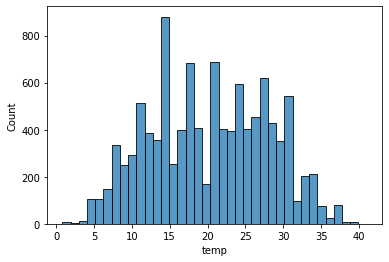

In [372]:
df.head()

sns.histplot(data = df, x = 'temp')

In [373]:
bins = [0,20,41]
groups = ['low', 'high'] 

df['temp_cat'] = pd.cut(df['temp'], bins = bins, labels= groups)


means during different temperature ranges : 
LOW:  132.0
HIGH:  248.0


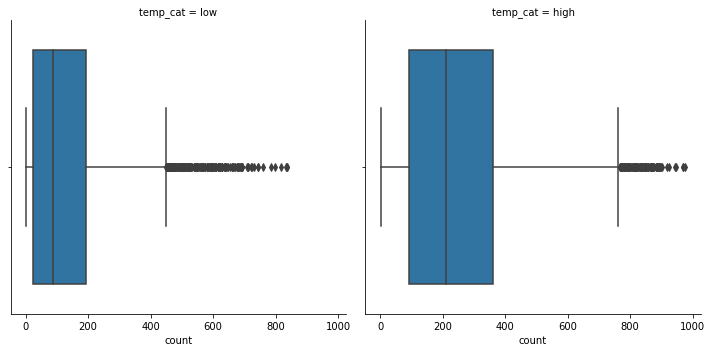

In [384]:
sns.catplot(data = df, x = 'count', col= 'temp_cat' , kind = 'box') 
print('means during different temperature ranges : ') 
print('LOW: ', df[df.temp_cat == 'low']['count'].mean().round())
print('HIGH: ', df[df.temp_cat == 'high']['count'].mean().round())

In [386]:
print(stats.ttest_ind(df[df.temp_cat == 'low']['count'], df[df.temp_cat == 'high']['count'], alternative='less'))
print(stats.f_oneway(df[df.temp_cat == 'low']['count'], df[df.temp_cat == 'high']['count']))
print(stats.kruskal(df[df.temp_cat == 'low']['count'], df[df.temp_cat == 'high']['count']))

Ttest_indResult(statistic=-35.25012169022282, pvalue=3.7824721645886625e-258)
F_onewayResult(statistic=1242.571079175517, pvalue=7.564944329205988e-258)
KruskalResult(statistic=1144.7274168237232, pvalue=6.2778401386791565e-251)


Conclusion: We can definately conclude higher warmer temperature favours the demand and usage of Yulu bikes.

Covariance: 
[[60.7088723  65.03672669]
 [65.03672669 71.81885578]]

correlation coefficient: 
[[1.         0.98494811]
 [0.98494811 1.        ]]


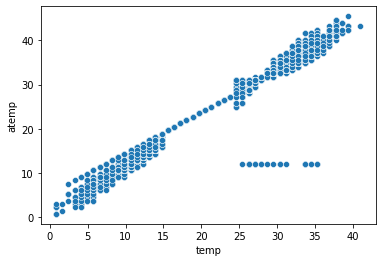

In [391]:
sns.scatterplot(data = df, x = 'temp', y = 'atemp')

print('Covariance: ')
print(np.cov(df['temp'], df['atemp']))

print()
print('correlation coefficient: ') 
print(np.corrcoef(df['temp'], df['atemp']))

Conclusion: Since temp vs atype is highly corelated, we can infer that atemp is also dependent on demand of number of yulu bikes.
high - atemp values, more bikes in demand. 
low - atemp values, less bikes used. 

<AxesSubplot:xlabel='humidity'>

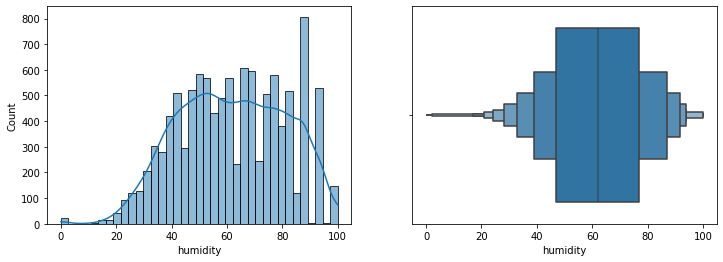

In [396]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(data = df, x = 'humidity', kde = 'True')

plt.subplot(122)
sns.boxenplot(data = df, x = 'humidity') 

## We will divide the data into two categories 
# humidity = low
# humidity = high 

In [406]:
bins = [0,61,100] 
groups = ['low', 'high'] 
df['humidity_cat'] = pd.cut(df['humidity'], bins= bins, labels= groups)

In [408]:
low_humid = df[df.humidity_cat == 'low']['count'] 
high_humid = df[df.humidity_cat == 'high']['count']
print("datapoints counts between low and high")
print(len(low_humid)) 
print(len(high_humid))

datapoints counts between low and high
5385
5479


In [414]:
print('Humidity means')
print("Low_humid: ", low_humid.mean().round(2))
print("high_humid: ", high_humid.mean().round(2))

print(stats.ttest_ind(low_humid, high_humid, alternative='greater'))
print(stats.levene(low_humid, high_humid))
print(stats.kruskal(low_humid, high_humid))

Humidity means
Low_humid:  239.47
high_humid:  145.15
Ttest_indResult(statistic=28.09710014466109, pvalue=4.830498670150273e-168)
LeveneResult(statistic=174.61368143177998, pvalue=1.4674541229026561e-39)
KruskalResult(statistic=920.9463362911484, pvalue=2.744078987672048e-202)


Conclusion:  We can reject our null hypothesis and say that there is a significant difference of number of bikes used depending on the level of humidity.

In [415]:
(239.47-145.15)/145.15

0.6498105408198415

# Observations and Recommendations: 
1. There is no significant difference in the count of bikes used on a working day vs a non-working day.
2. The number of bikes used is dependent on the season variable. 
we see that during season 1 significantly less amount of bikes are used and during season 3 there is huge demand, followed by season 2 and 4.
3. Weather 1 favors the usage of more bikes, followed by subsequent much greater harsh extreme whethers 2, 3 
4. significant difference of number of bikes used depending on the level of humidity. Low humidity more bikes used. Almost 65% more bikes are used compared to high humidity days.
5. warmer temperature favours the demand and usage of Yulu bikes. On an average there is a 87% increase in count average during warm temp when compared to cooler temp. 

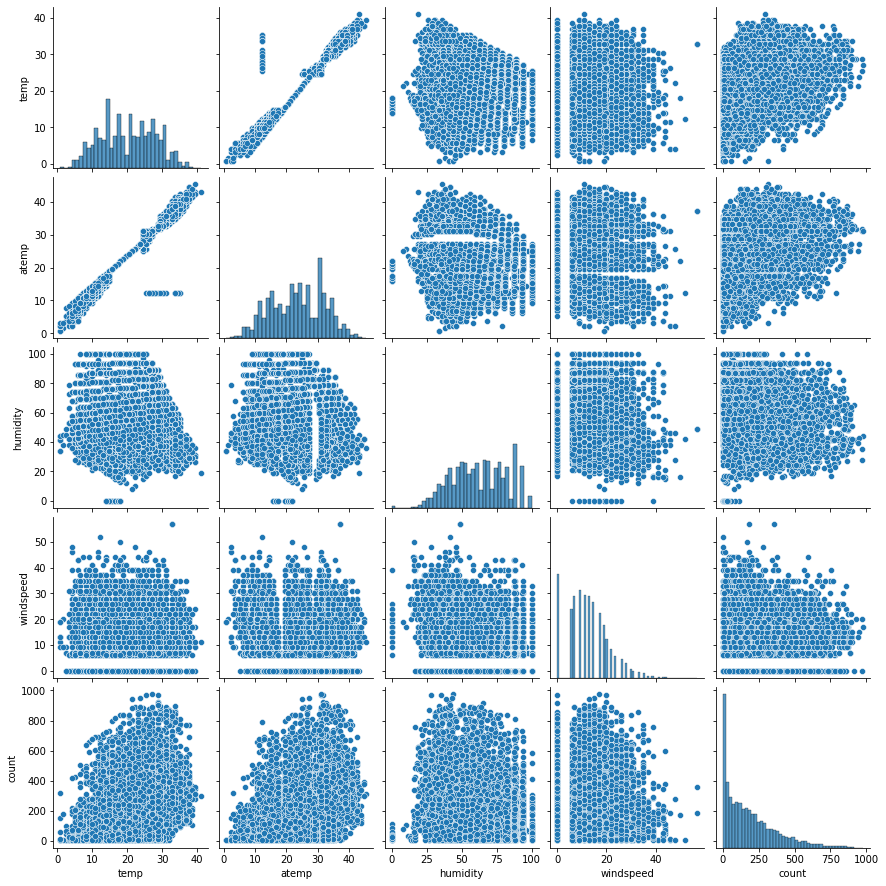

In [365]:
sns.pairplot(data = numerical)